In [72]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("car_crashes.csv")

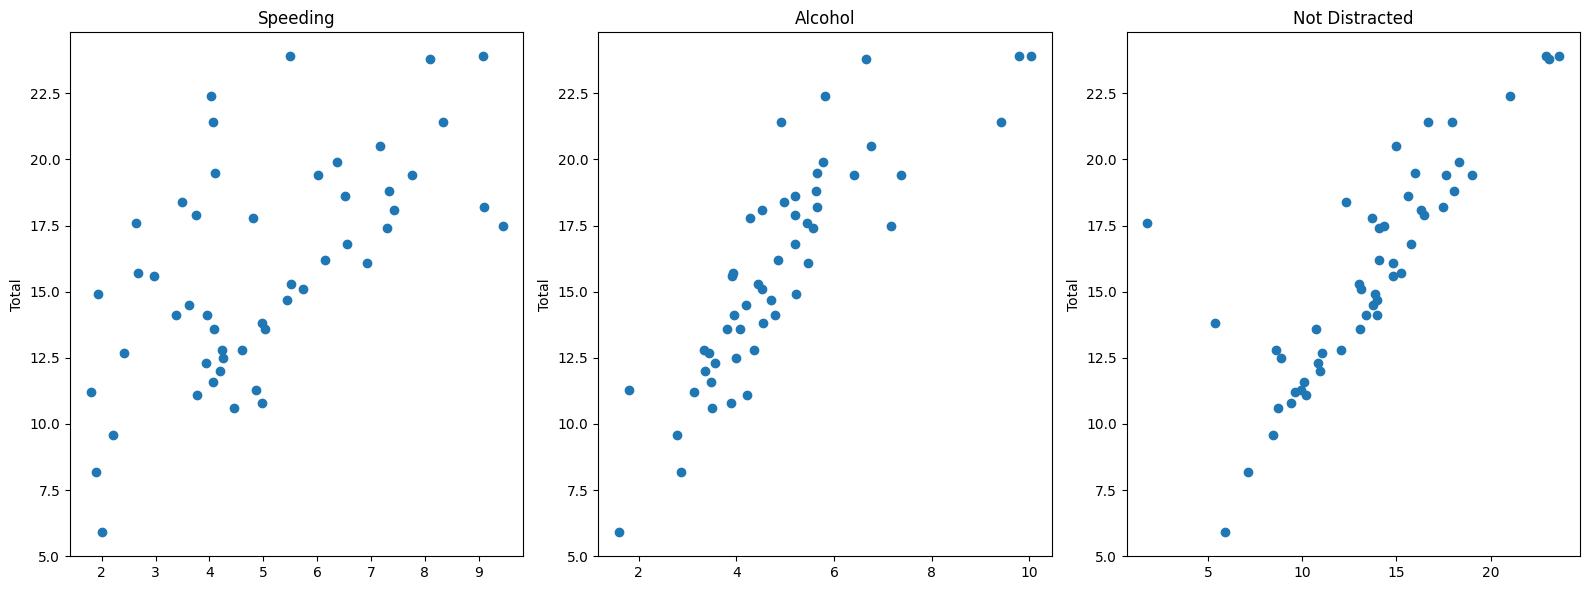

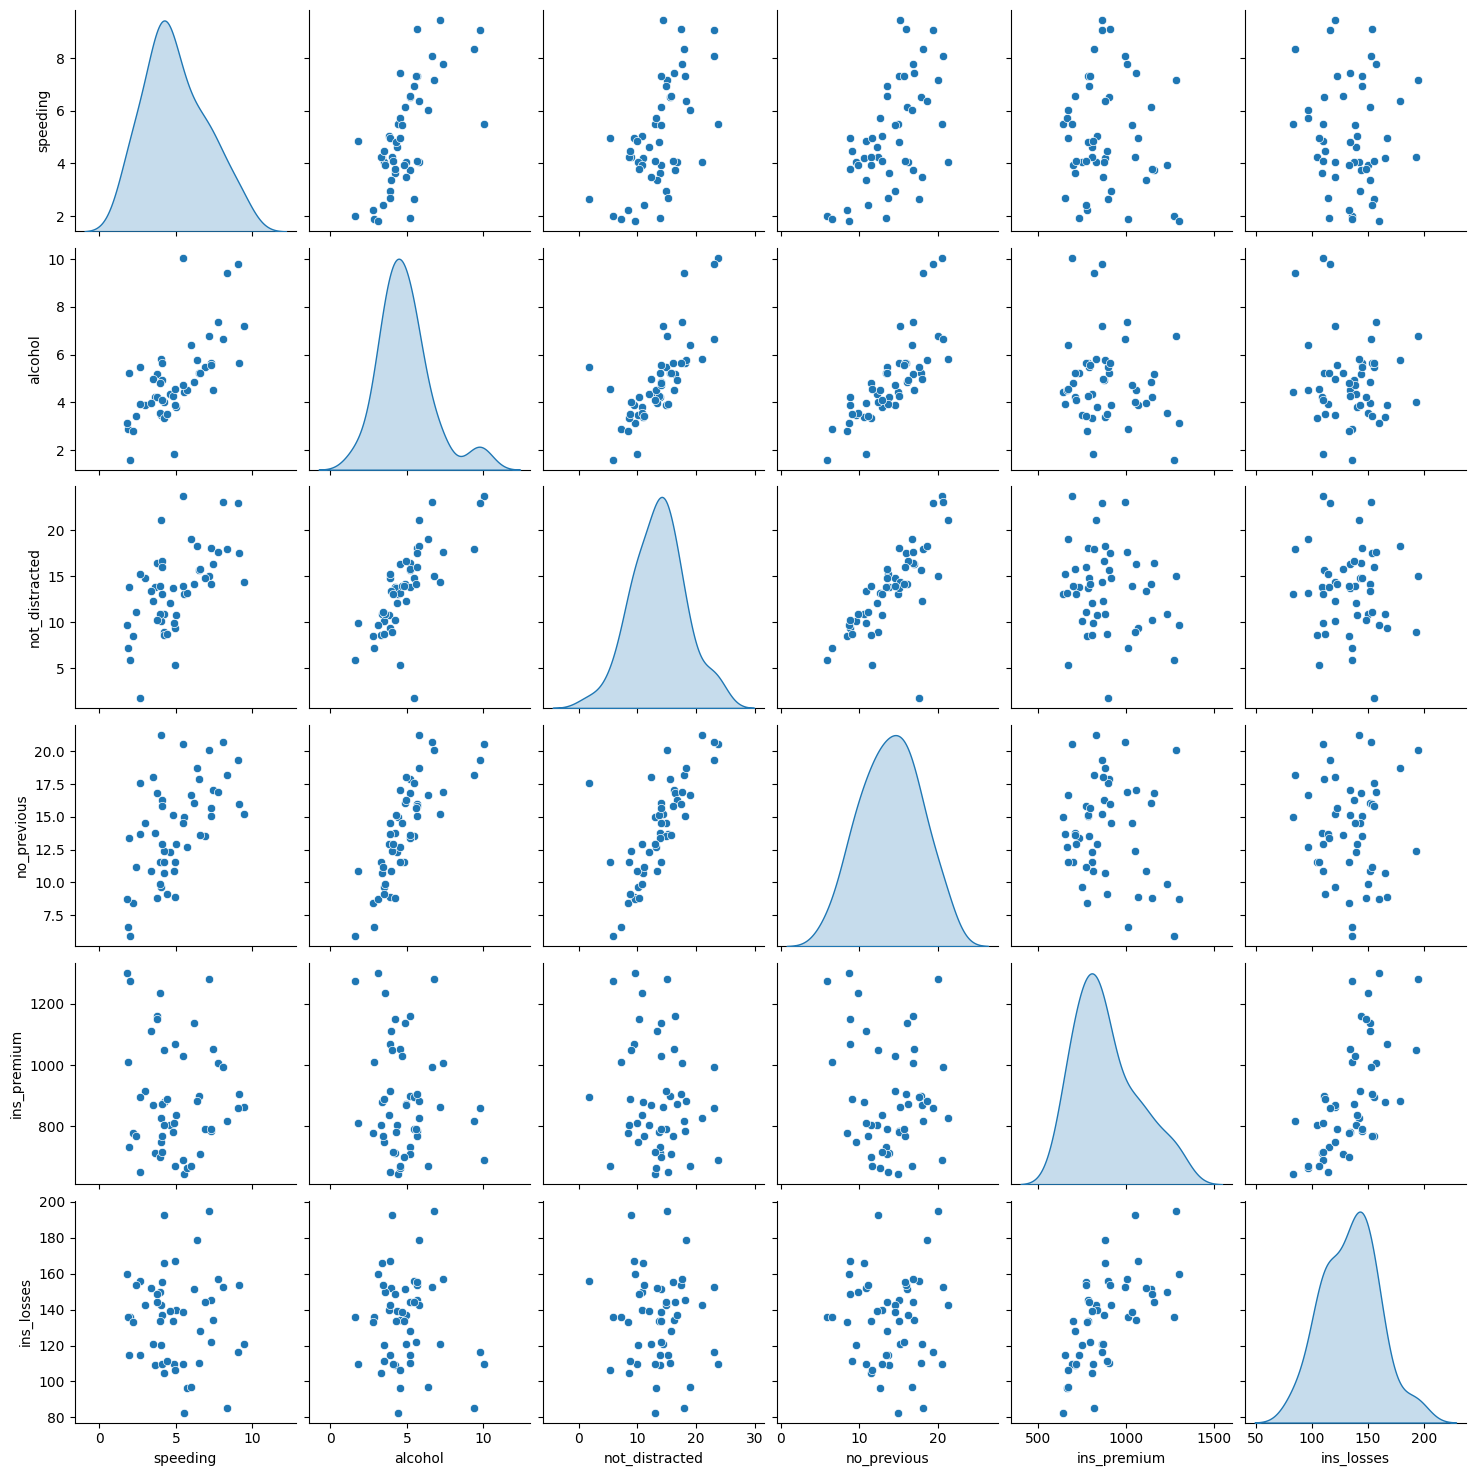

In [74]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df['speeding'],df['total'],'o')
axes[0].set_ylabel("Total")
axes[0].set_title("Speeding")

axes[1].plot(df['alcohol'],df['total'],'o')
axes[1].set_ylabel("Total")
axes[1].set_title("Alcohol")

axes[2].plot(df['not_distracted'],df['total'],'o')
axes[2].set_ylabel("Total")
axes[2].set_title("Not Distracted")
plt.tight_layout();
sns.pairplot(df.drop("total",axis=1),diag_kind='kde')

In [75]:
# df.head()
X = df.drop(['total','abbrev'],axis=1)
y = df['total']

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error and R-squared metrics
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f"{MAE}\n{MSE}\n{RMSE}")
df['total'].mean()

0.6391365460176682
0.6027923970458784
0.7763970614613881


15.79019607843137

In [77]:
test_predictions = model.predict(X_test)
test_res = y_test - test_predictions

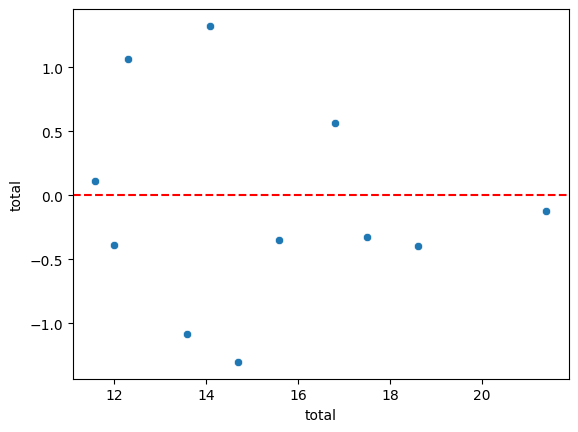

In [78]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

length: 11


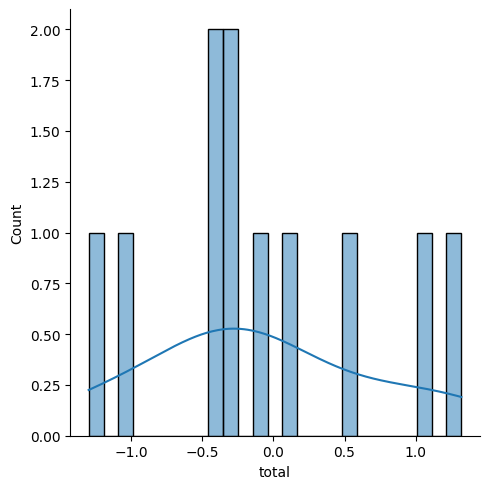

In [79]:
print(f"length: {len(test_res)}")

sns.displot(test_res,bins=25,kde=True)

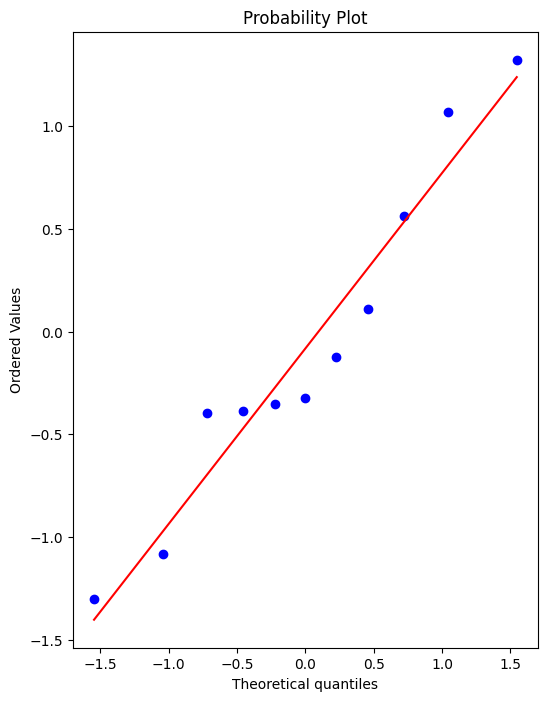

In [80]:
import scipy as sp
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)